# Homework 6. AMATH 584.

Marlin Figgins.

1. Using various $AX = B$ solvers, determine a mapping from the image space to the label space.

2. By promoting sparsity, determine and rank which pixels in the MNIST set are most informative for correctly labeling the digits. (You’ll have to come up with your own heuristics or empirical rules for this. Use pcolor to help you visualize the results from X)

3. Apply your most important pixels to the test data set to see how accurate you are with as few pixels as possible.

4. Redo the analysis with each digit individually to find the most important pixels for each digit.
5. IMPORTANT: Think about the interpretation of what you are doing with this $AX = B$ problem.

### Note: 

If you are viewing this as a jupyter notebook, please run section A. Helper Functions first.

In [1]:
using LinearAlgebra, Plots

## Processing Data

In [2]:
using MLDatasets, Flux

In [3]:
train_data, train_labels = MNIST.traindata(Float64);
test_data, test_labels = MNIST.testdata(Float64);

In [4]:
X_test = Flux.flatten(test_data)
X = Flux.flatten(train_data)

784×60000 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [5]:
label_names = sort(unique(train_labels))

B_test = Flux.onehotbatch(test_labels, label_names)
B = Flux.onehotbatch(train_labels, label_names)

10×60000 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}:
 0  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  1  0  1  0  0  0  0     0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  1  0  1     0  0  0  0  0  0  0  0  1  0  0  0
 0  0  1  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  1  0  …  0  0  0  0  0  1  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  1  0  0  0  0  0  1  0  0  0  1
 0  0  0  0  1  0  0  0  0  0  0  0  0     0  0  1  0  1  0  0  0  0  0  0  0

As a check, let's take a look at the size of the matrices $X$ and $B$ 

In [6]:
size(X)

(784, 60000)

In [7]:
size(B)

(10, 60000)

## 1. Finding a mapping

1. Using various $AX = B$ solvers, determine a mapping from the image space to the label space.

In what follows, we'll let the matrix $X$ denote each of the images and the matrix $B$ be the one-hot encoded labels with each observation being a row. Our goal is to find a linear mapping $\beta$ so that
\begin{equation}
\beta X  = B.
\end{equation}

### Least Squares and argmax
We can solve the equation $\beta X=B$ by least squares. This will gives the matrix $\beta$ which is closest to $B$ in the two norm. 

In [8]:
beta_LS = B * pinv(X)

10×784 Array{Float64,2}:
 -1.68189e-14   1.29399e-12  -6.17635e-13  …  -0.925144    0.0  0.0  0.0  0.0
  1.48978e-13  -2.83425e-13   2.33419e-13      0.813499    0.0  0.0  0.0  0.0
 -1.79994e-12  -7.00351e-13  -4.06922e-13      0.385303    0.0  0.0  0.0  0.0
 -3.00838e-12  -1.86109e-12  -1.49922e-12     -0.788003    0.0  0.0  0.0  0.0
  1.9529e-13   -8.77489e-13   2.69507e-13      0.317956    0.0  0.0  0.0  0.0
 -2.21156e-12  -6.46712e-13  -7.76432e-13  …   0.209582    0.0  0.0  0.0  0.0
  8.55582e-12   2.72037e-12   2.99642e-12      0.717458    0.0  0.0  0.0  0.0
  2.41069e-12   1.21812e-12   9.24853e-13      3.48155     0.0  0.0  0.0  0.0
  2.02457e-12   1.23682e-13   6.52503e-13     -0.00460585  0.0  0.0  0.0  0.0
  8.02031e-13   1.05325e-12   5.24591e-13     -3.46048     0.0  0.0  0.0  0.0

Taking the result of this and finding the argmax of the resulting column vector should give us the least square prediction in label space. 

#### Least squares training accuracy

In [9]:
function least_squares_predict(beta, X, labels)
    Y_LS = Vector{Int64}(undef, length(labels))
    for label in 1:length(labels)
        Y_LS[label] = get_pred(beta, X, label)
    end
    return Y_LS
end

least_squares_predict (generic function with 1 method)

In [72]:
Y_LS = least_squares_predict(beta_LS, X, train_labels)
percent_correct(train_labels, Y_LS)

0.8519333333333333

#### Least squares testing accuracy

In [73]:
Y_LS = least_squares_predict(beta_LS, X_test, test_labels)
percent_correct(test_labels, Y_LS)

0.8534

Here, we see that the least squares solution gives us 85% accuracy on our test data set.

### Suite of solvers including Ridge and LASSO

I'll now try and use a couple of other solvers including LASSO and Ridge regression. I'm just going to import them directly from ScikitLearn.

### LASSO

In [15]:
using ScikitLearn
@sk_import linear_model: Lasso

PyObject <class 'sklearn.linear_model._coordinate_descent.Lasso'>

In [16]:
modelLasso = Lasso(alpha = 0.01, warm_start = true)
fit!(modelLasso, X', B')

PyObject Lasso(alpha=0.01, warm_start=True)

In [17]:
λ_range = [0.001, 0.1, 0.5, 1.0, 1.5]

TrainingAccuracyByLambda, TestAccuracyByLambda = model_accuracy(modelLasso, λ_range)

([0.84605, 0.11236666666666667, 0.11236666666666667, 0.11236666666666667, 0.11236666666666667], [0.8541, 0.1135, 0.1135, 0.1135, 0.1135])

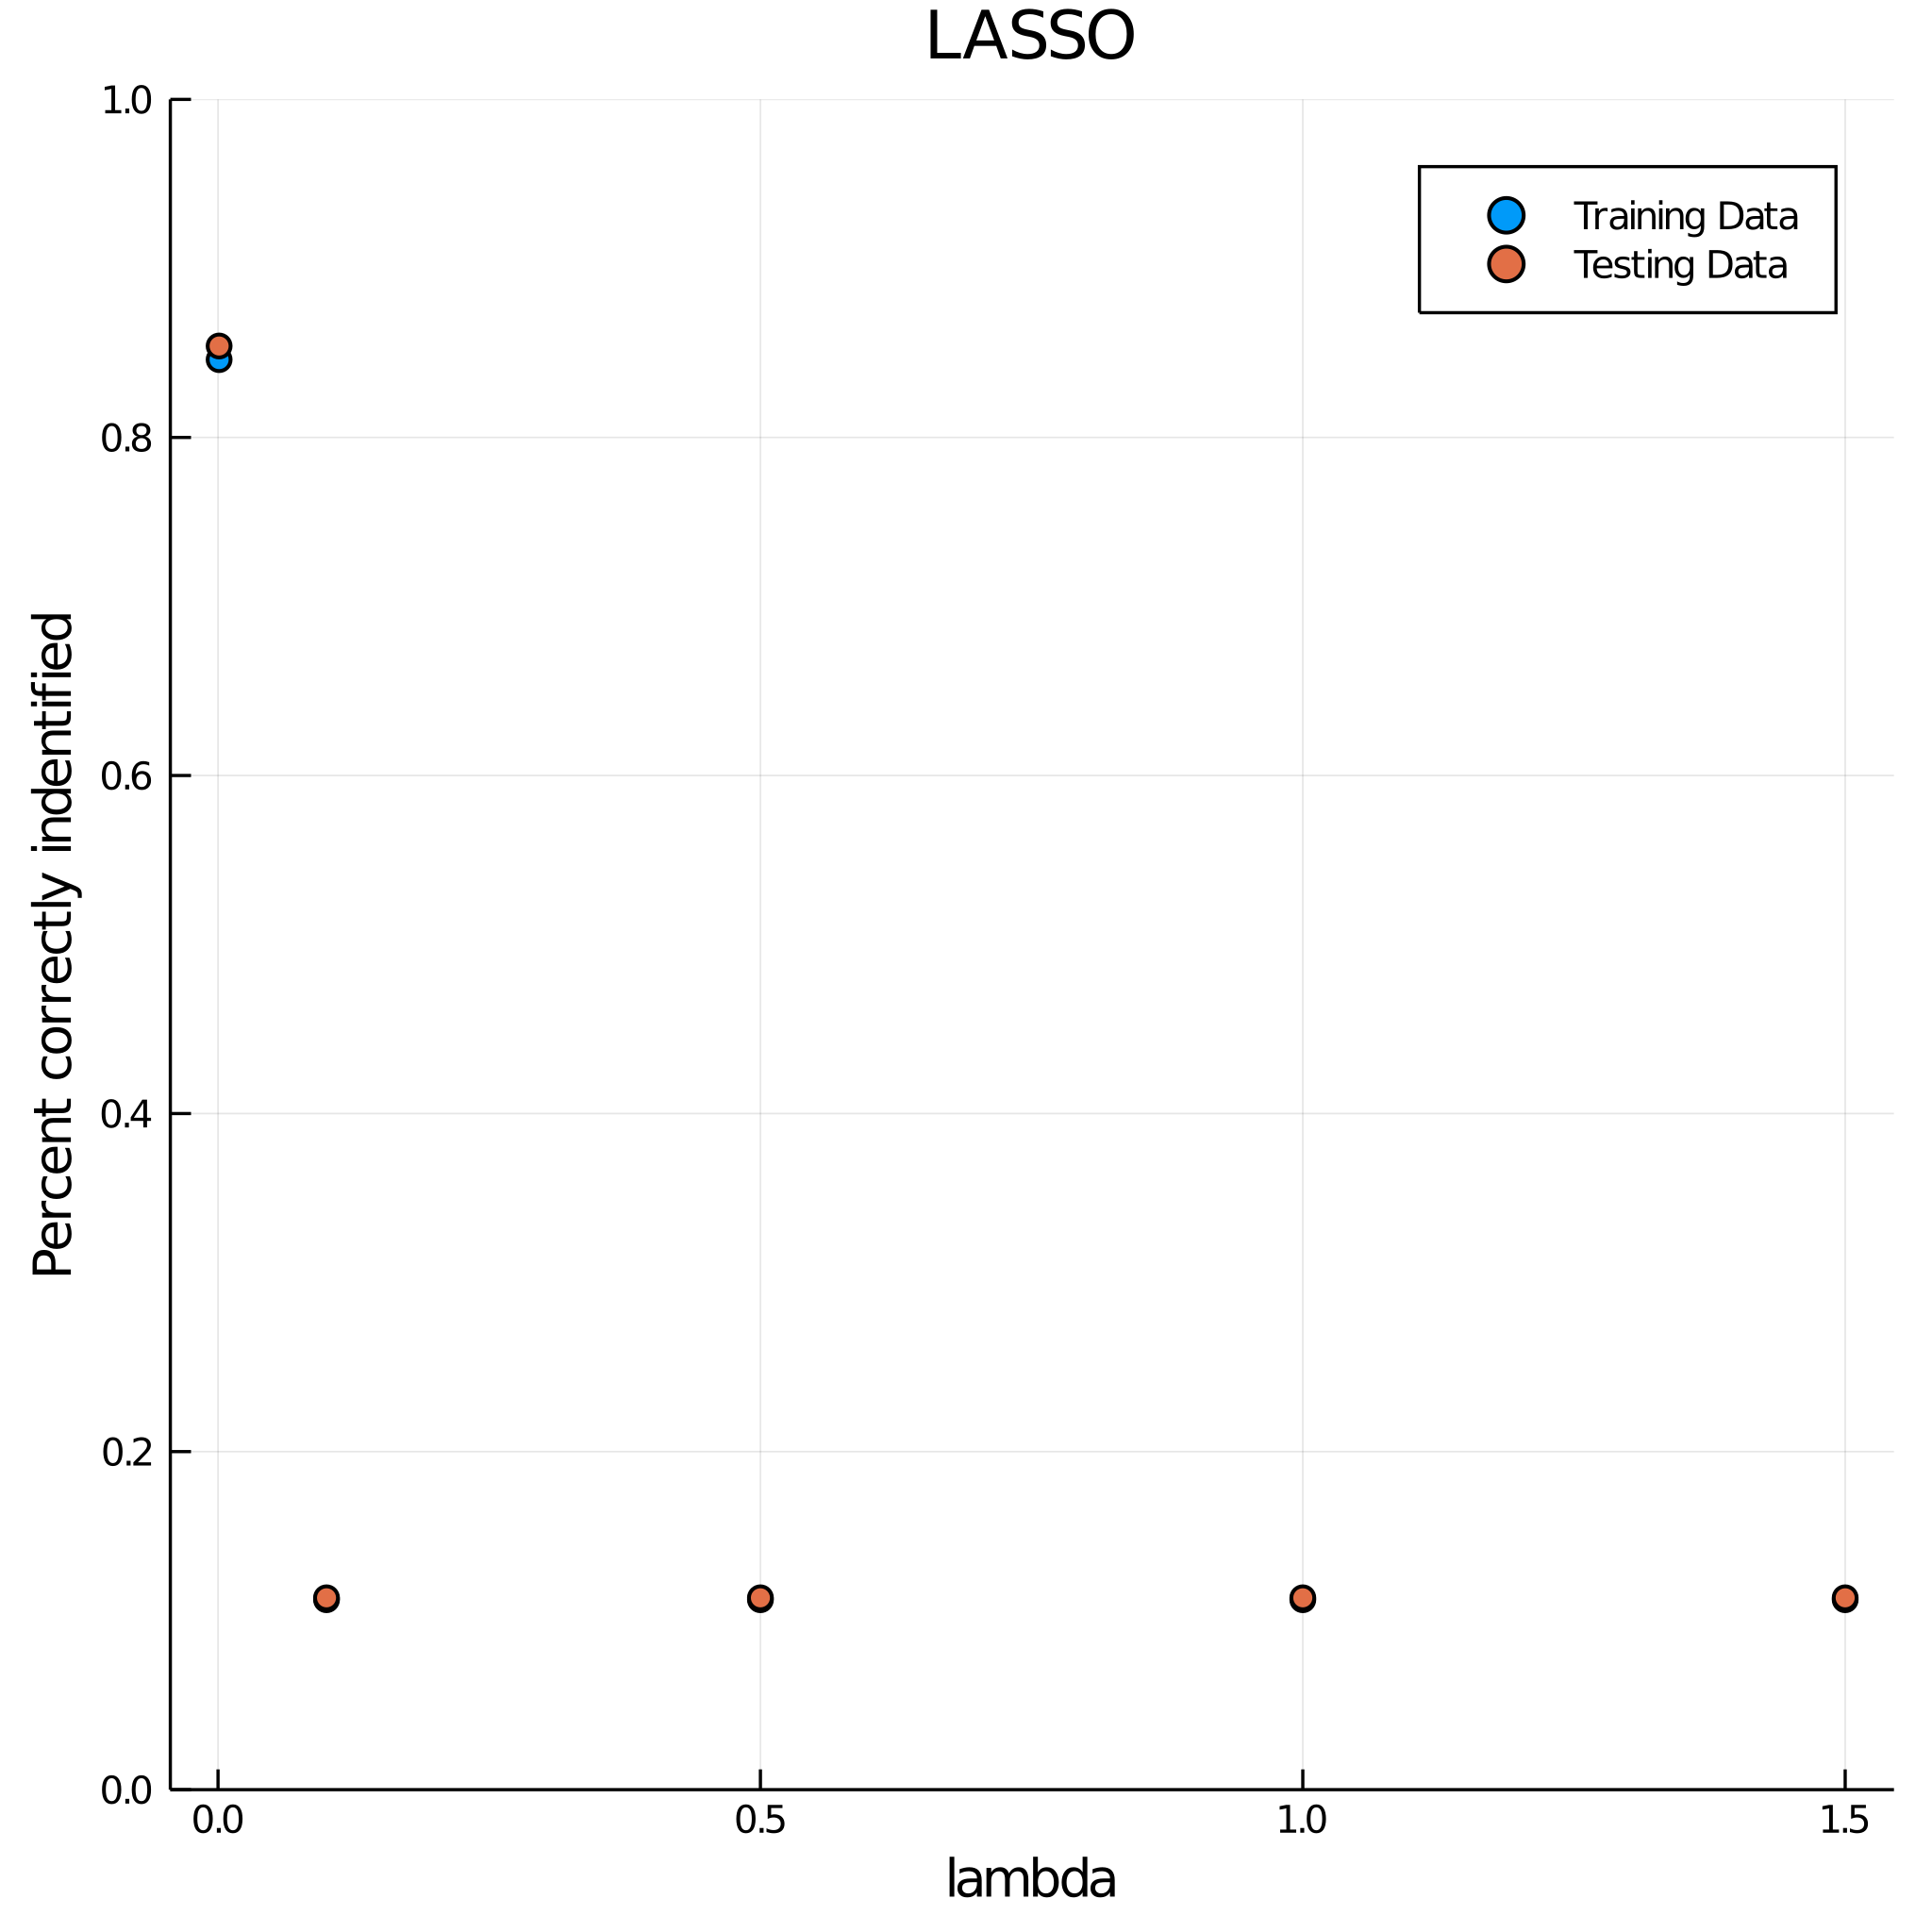

In [18]:
scatter(λ_range, 
    [TrainingAccuracyByLambda TestAccuracyByLambda],
    xlabel = "lambda",
    ylabel = "Percent correctly indentified",
    label = ["Training Data" "Testing Data"],
    title = "LASSO",
    ylim = (0, 1),
    size = (600,600))

Here, we see that we can get decent accuracy (approximately 85%) for low values of $\lambda$. Though this is very slightly lower than least squares' accuracy, we see that the transformation matrix much more sparse compared to least squares.

In [19]:
λ_LASSO_best = λ_range[argmax(TestAccuracyByLambda)]

modelLasso = Lasso(alpha = λ_LASSO_best)
fit!(modelLasso, X', B')
betaLASSO = modelLasso[:coef_]

10×784 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  -0.0  -0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.0  -0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.0   0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.0  -0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  -0.0  -0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.0   0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0   0.0  0.0  0.0  0.0  0.0

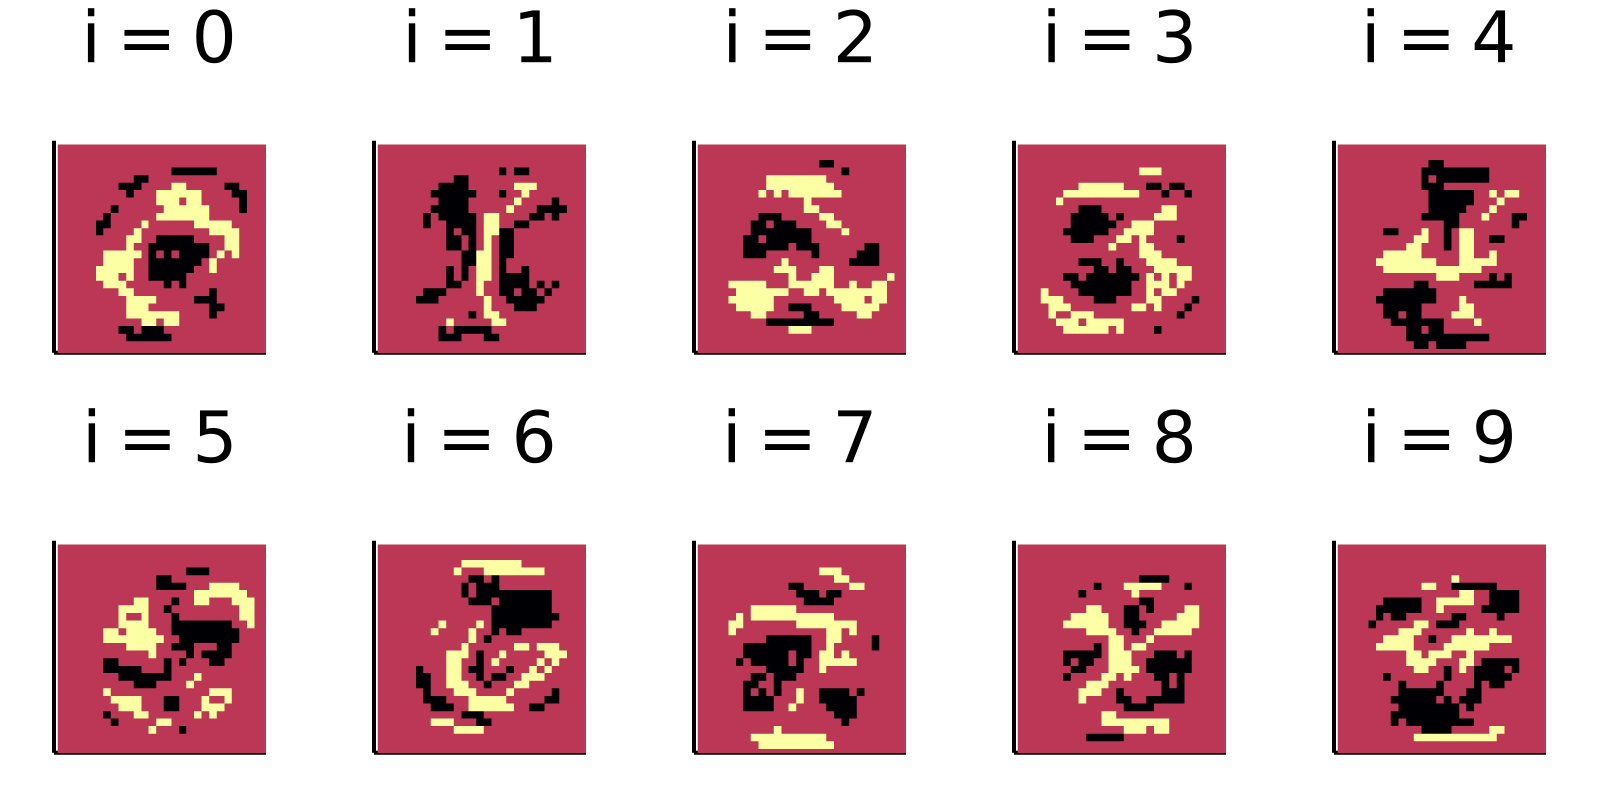

In [20]:
draw_digit_plot( (betaLASSO .> 0) .- (betaLASSO .< 0))

With this sparseness induced by LASSO, we can identify and indentify the relevant pixels used to identify each of the digits. In the above, yellow pixels have positive weights for idenitfying the digit and the black have negative weight. Funny enough the yellow points loosely resemble the digits themselves, so hopefully, we're on the right track here.

In [21]:
sum(sum(betaLASSO .!= 0, dims = 1) .> 0)

438

As you can see here above, only about 438 of these pixels above are useful for the idenitication

### Ridge Regression

In [22]:
@sk_import linear_model: Ridge

PyObject <class 'sklearn.linear_model._ridge.Ridge'>

In [23]:
modelRidge = Ridge(alpha = 0.01)
fit!(modelRidge, X', B')

PyObject Ridge(alpha=0.01)

In [24]:
λ_range = [0.001, 0.1, 0.5, 1.0, 1.5]

TrainingAccuracyByLambda, TestAccuracyByLambda = model_accuracy(modelRidge, λ_range)

([0.85775, 0.8576833333333334, 0.8576, 0.8574, 0.8572666666666666], [0.8602, 0.8604, 0.8604, 0.8604, 0.8603])

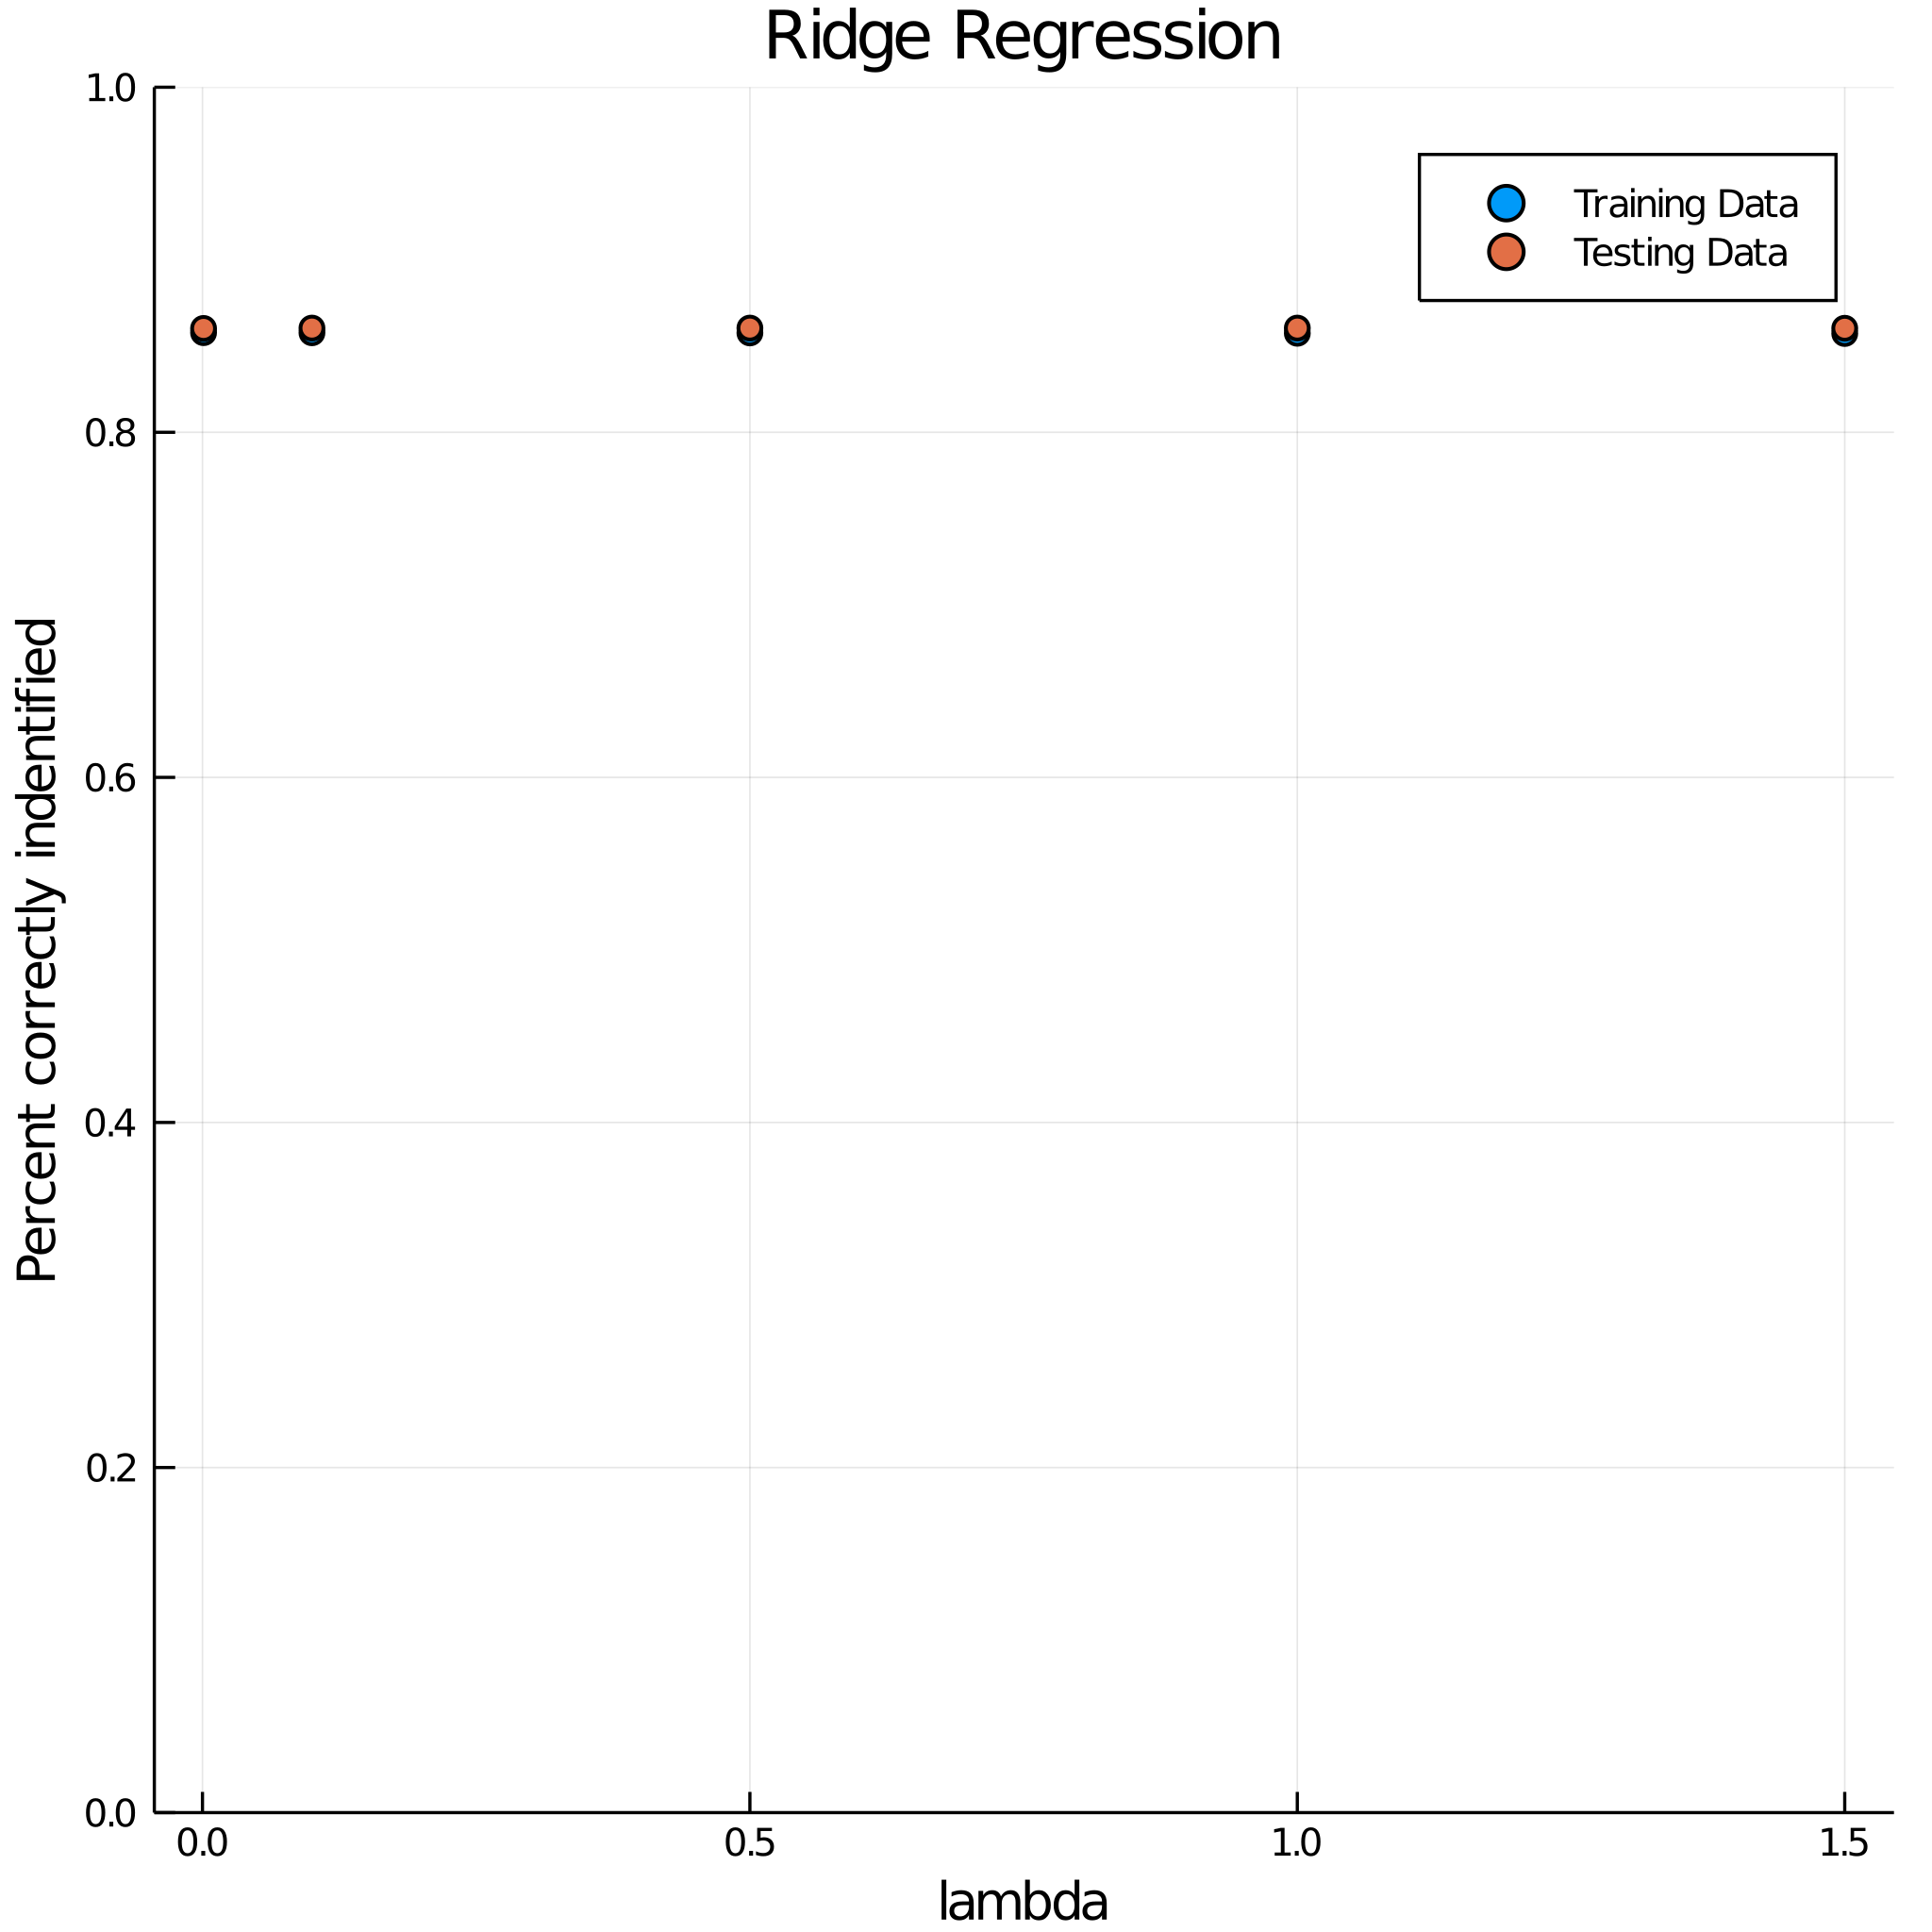

In [25]:
scatter(λ_range, 
    [TrainingAccuracyByLambda TestAccuracyByLambda],
    xlabel = "lambda",
    ylabel = "Percent correctly indentified",
    label = ["Training Data" "Testing Data"],
    title = "Ridge Regression",
    ylim = (0, 1),
    size = (600,600))

We see that the Ridge regression performs slightly better than the least squares across both the test and training set.

In [26]:
λ_RIDGE_best = λ_range[end]

fit!(modelRidge, X', B')
betaRidge = modelRidge[:coef_]

10×784 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  -0.0531266    0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.00141544   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.00112473   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.000637993  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.0213835    0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  -0.0037527    0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0122516    0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.104414     0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.00614326   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.0448932    0.0  0.0  0.0  0.0

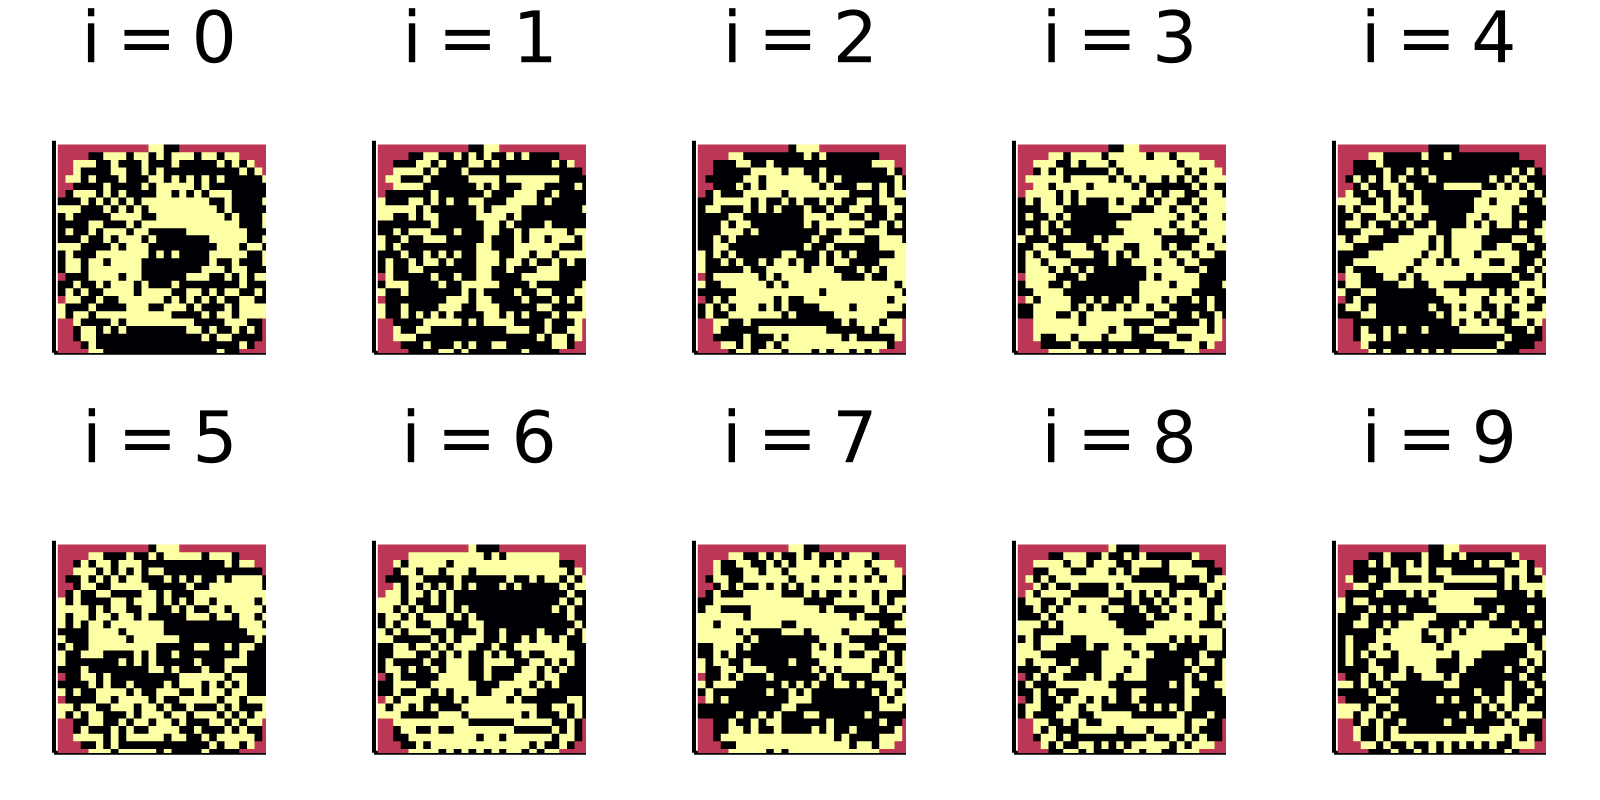

In [27]:
draw_digit_plot((betaRidge .> 0) .- (betaRidge .< 0))

We see that in exchange for higher accuracy nearly all of the pixels are used for prediction unlike with LASSO.

### One Layer Network using Flux

We'll implment this as a one layer NN. To do this, we'll be using the Flux package.

In [28]:
# For Flux, we have to reshape our data in a particular format
data = [(X[:,i], B[:,i]) for i in 1:size(X)[1]];

We'll use a variant of stochastic gradient descent to optimize this according to the L2 norm.

In [29]:
optimizer = ADAM()

ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}())

Mathematically, we can write this as
\begin{equation}
WX + b = B,
\end{equation}
where $W$ is a matrix and $b$ a column vector. Note that we additionally, normalize with softmax, so that the components of our prediction add to one.

In [30]:
# In Julia, we can intialize a dense layer with size
layer1 = Dense(size(X)[1], size(B)[1])
model_1(x) = Chain(layer1, softmax)(x)

model_1 (generic function with 1 method)

In [31]:
#loss_L2(x,y) = (1/2)*norm(model_1(x) - y, 2) ^ 2
loss_L2(x,y) = Flux.mse(model_1(x),y)
l1_reg(m) = sum(abs, m)

λ = 0.00001
loss(x,y) = loss_L2(x,y) + λ*sum(l1_reg, params(layer1.W))

loss (generic function with 1 method)

In [32]:
# Here, we train our model and find parameters W and b that minimize our loss
for i in 20000
    Flux.train!(loss, 
    Flux.params(layer1.W),
    data, 
    optimizer);
end

Let's evaluate this model against the true training labels

In [33]:
## Convert to number 
yhat = Flux.onecold(model_1(X), 0:9)
percent_correct(yhat, train_labels)

0.8002833333333333

Let's now find our accuracy on the testing data

In [34]:
yhat = Flux.onecold(model_1(X_test), 0:9)
percent_correct(yhat, test_labels)

0.8036

In [35]:
## Visualize Pixel Weighting

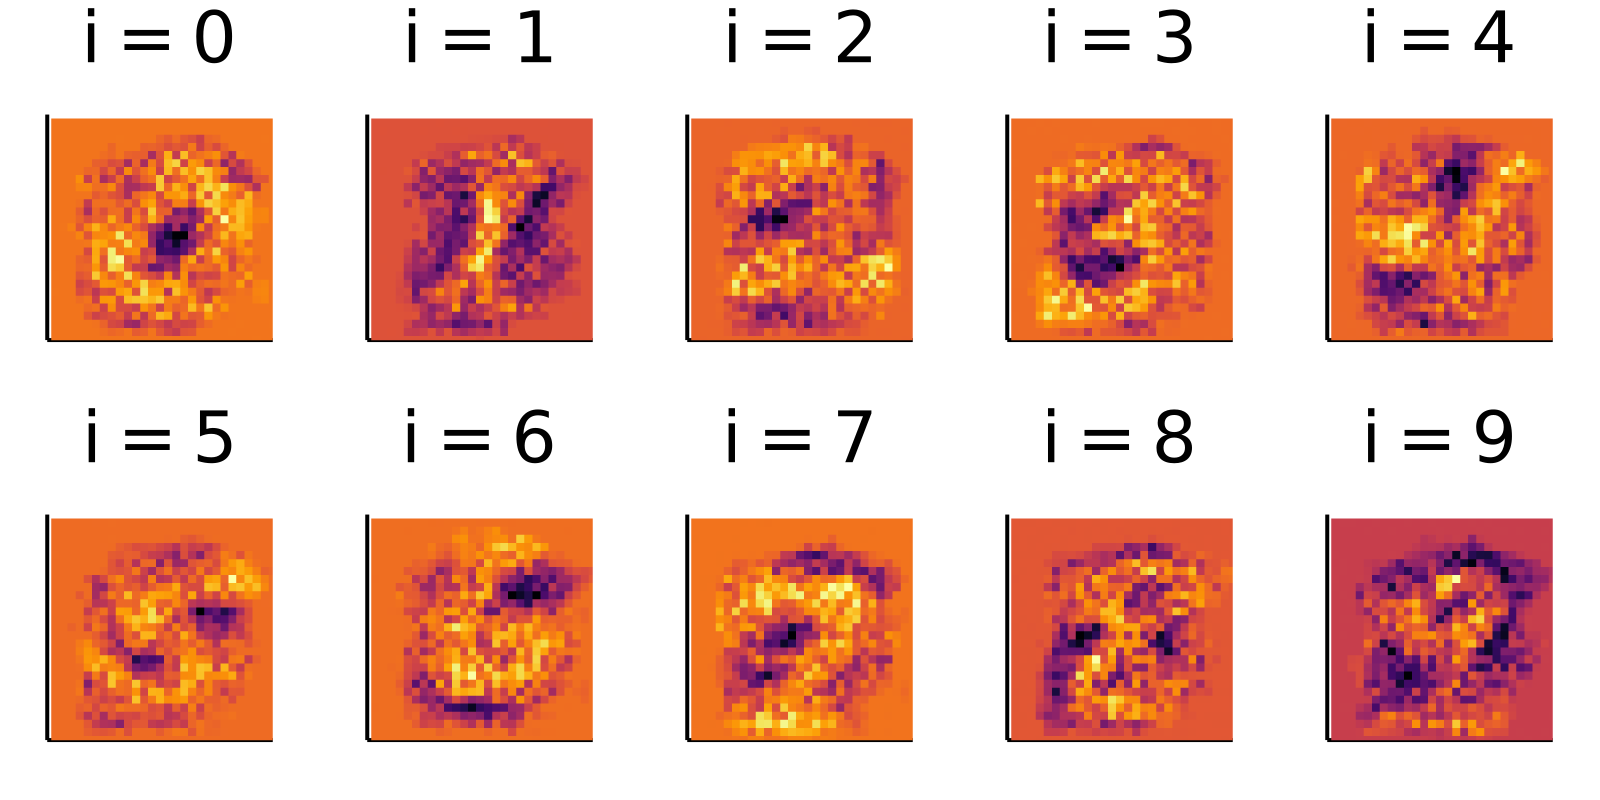

In [36]:
draw_digit_plot(layer1.W )

Here, we can see that we achieve accuracy close to 80% but the L1 regularization doesn't appear to work very well here.

In [37]:
layer2 = Dense(size(X)[1], size(B)[1])
model_2(x) = Chain(layer2, softmax)(x)

model_2 (generic function with 1 method)

In [38]:
loss_L1(x,y) = norm(model_2(x) - y, 1)

λ2 = 0.001
loss_2(x,y) = loss_L1(x,y) + λ2*reg()

loss_2 (generic function with 1 method)

In [68]:
for i in 200000
    Flux.train!(loss_L1, 
    params(layer2.W),
    data, 
    optimizer);
end

In [69]:
## Convert to number 
yhat = Flux.onecold(model_2(X), 0:9)
percent_correct(yhat, train_labels)

0.8457333333333333

In [70]:
yhat = Flux.onecold(model_2(X_test), 0:9)
percent_correct(yhat, test_labels)

0.8488

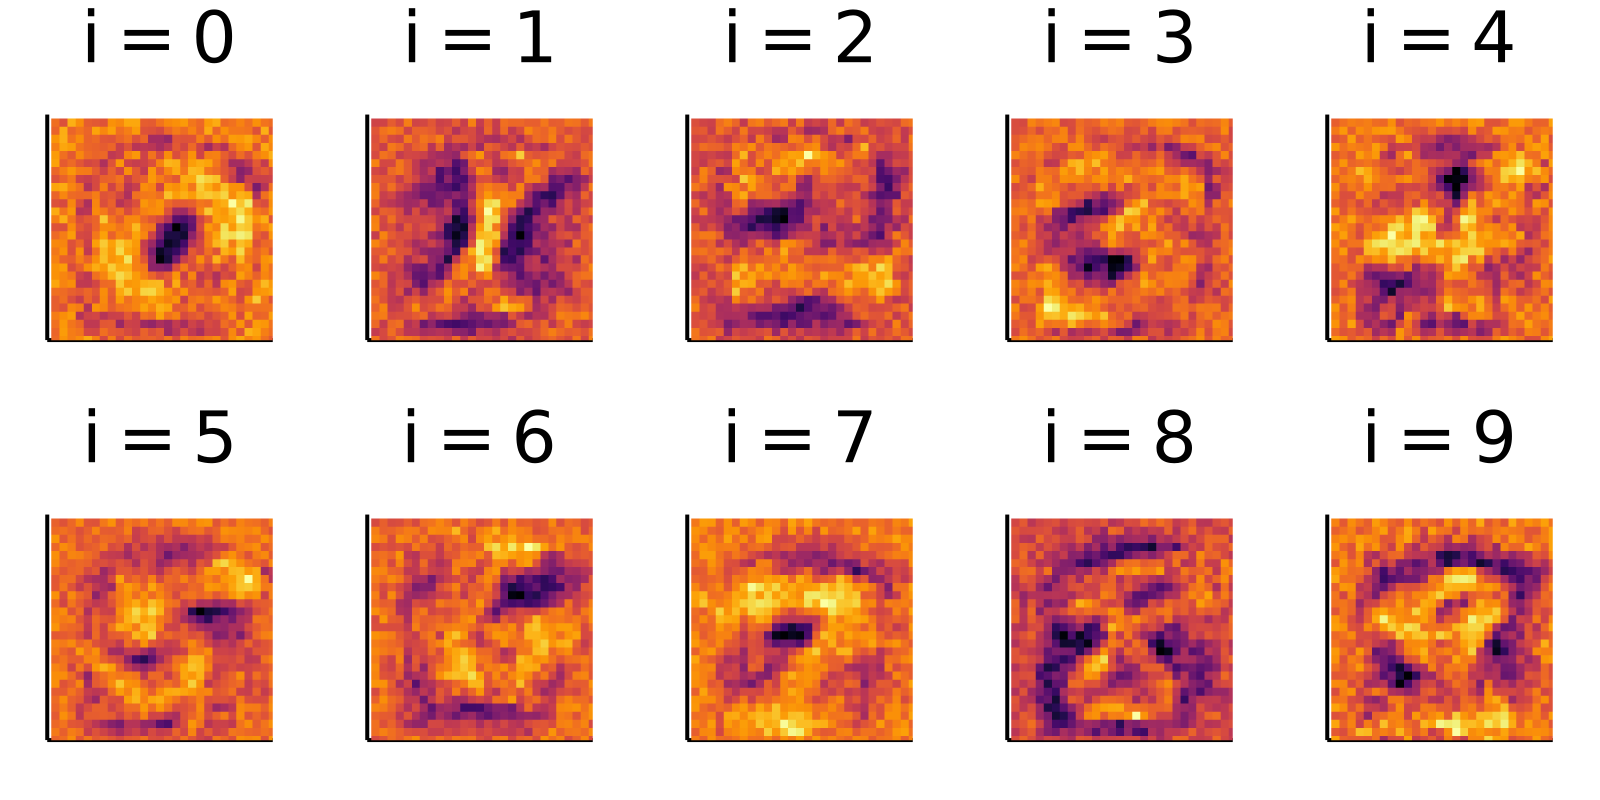

In [71]:
draw_digit_plot(layer2.W)

If we instead use L1 norm as our loss and L1 regularization, the one layer NN is on par with the other methods.

## 2. Promoting Sparsity and 3. Testing most important pixels

As we saw earlier, using the LASSO regression seemed to be the best way to promote sparsity in our solution. We'll now try to expand upon our regression to see how few unique pixels we need in order to make good predictions.

In [43]:
function top_k_pixels(beta, k)
    tmp_array = mapslices(x -> norm(x, 1), beta, dims = 1)
    sortperm(tmp_array[:], rev = true)[1:k]
end 

function is_present(pixel_indices)
    present_vec = zeros(784)
    present_vec[pixel_indices] .= 1
    return present_vec
end

is_present (generic function with 1 method)

In [44]:
top_k_pixels(betaLASSO, 20)

20-element Array{Int64,1}:
 351
 713
 278
 377
 249
 721
 719
 221
 349
 103
 379
 104
 718
 360
 102
 544
 714
  73
 720
 717

In [45]:
## Visualizng top n pixels

top_digits = []
k_range = [10 25 50 100 200 300]

for k in k_range
    push!(top_digits,
    heatmap( reshape(is_present(top_k_pixels(betaLASSO, k)), 28, 28),
    title = "Best $k Pixels",
    colorbar = false,
    xticks = false,
    yticks = false))
end

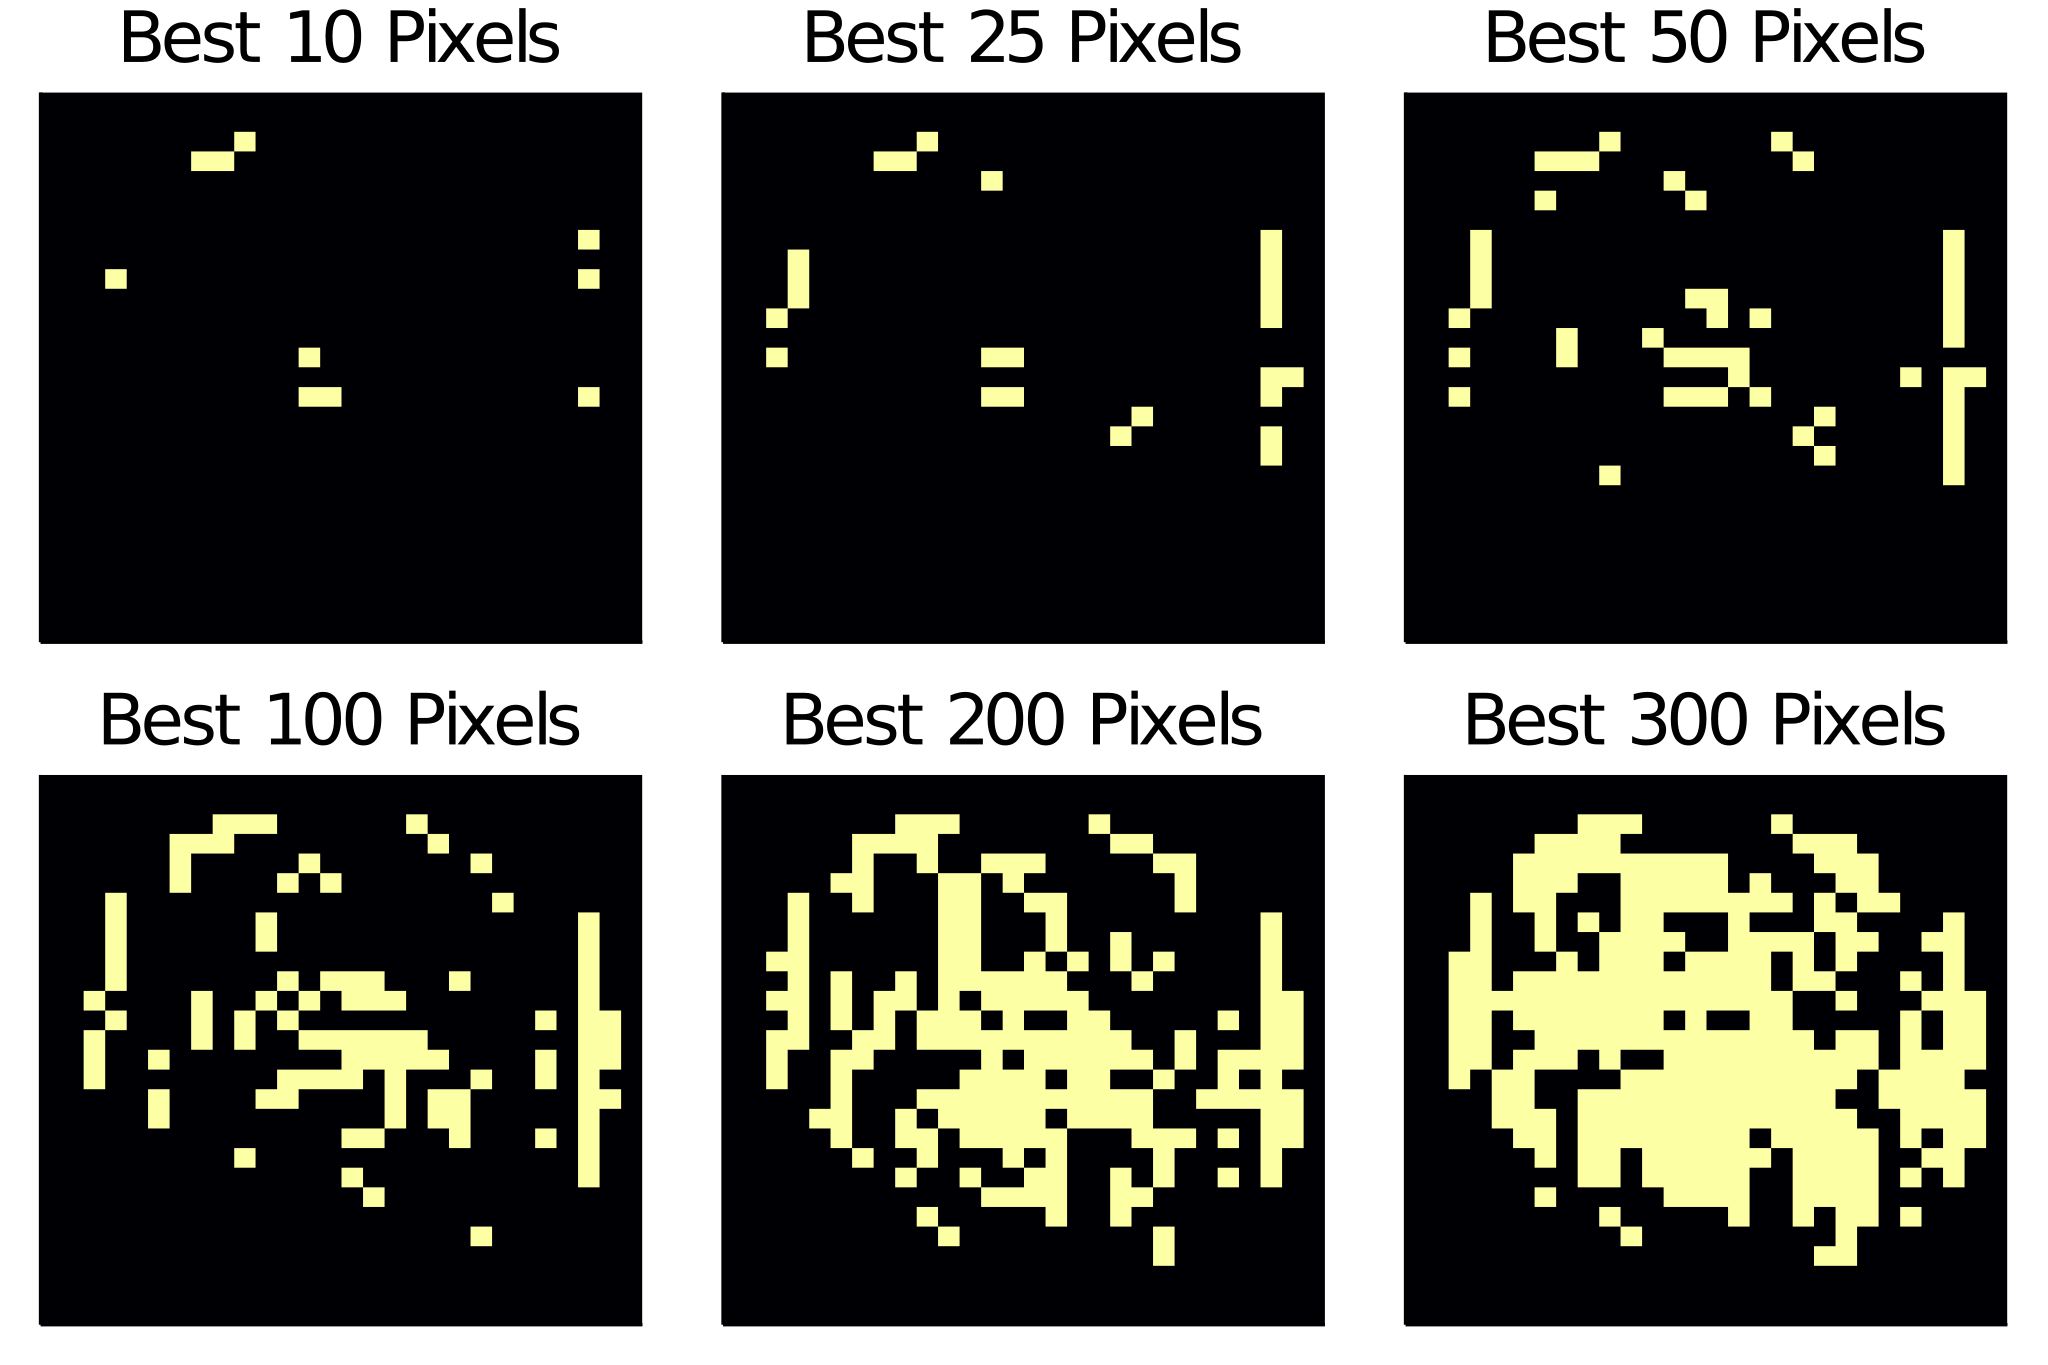

In [46]:
plot(top_digits...)

In [47]:
## Do regression on only these top k pixels
function mask_data_mat(X, top_pixels)
    excluded = setdiff(1:size(X)[1], top_pixels)
    Y = copy(X)
    Y[excluded,:] .= 0
    return Y
end

mask_data_mat (generic function with 1 method)

For simplicity, we'll do least squares on the top remaining pixels and see how accurate we can get.

In [48]:
TrainAccuracyKPixels = Float64[]
TestAccuracyKPixels = Float64[]

k_range = [10 25 50 75 100 125 150 175 200 225 250 275 300]
for k in k_range
    kbetaLS = B * pinv(mask_data_mat(X, top_k_pixels(betaLASSO, k)))
    
    yhat = least_squares_predict(kbetaLS, X, train_labels)
    
    push!(TrainAccuracyKPixels,
        percent_correct(yhat, train_labels))
    
    yhat = least_squares_predict(kbetaLS, X_test, test_labels)
    push!(TestAccuracyKPixels, 
        percent_correct(yhat, test_labels))
end

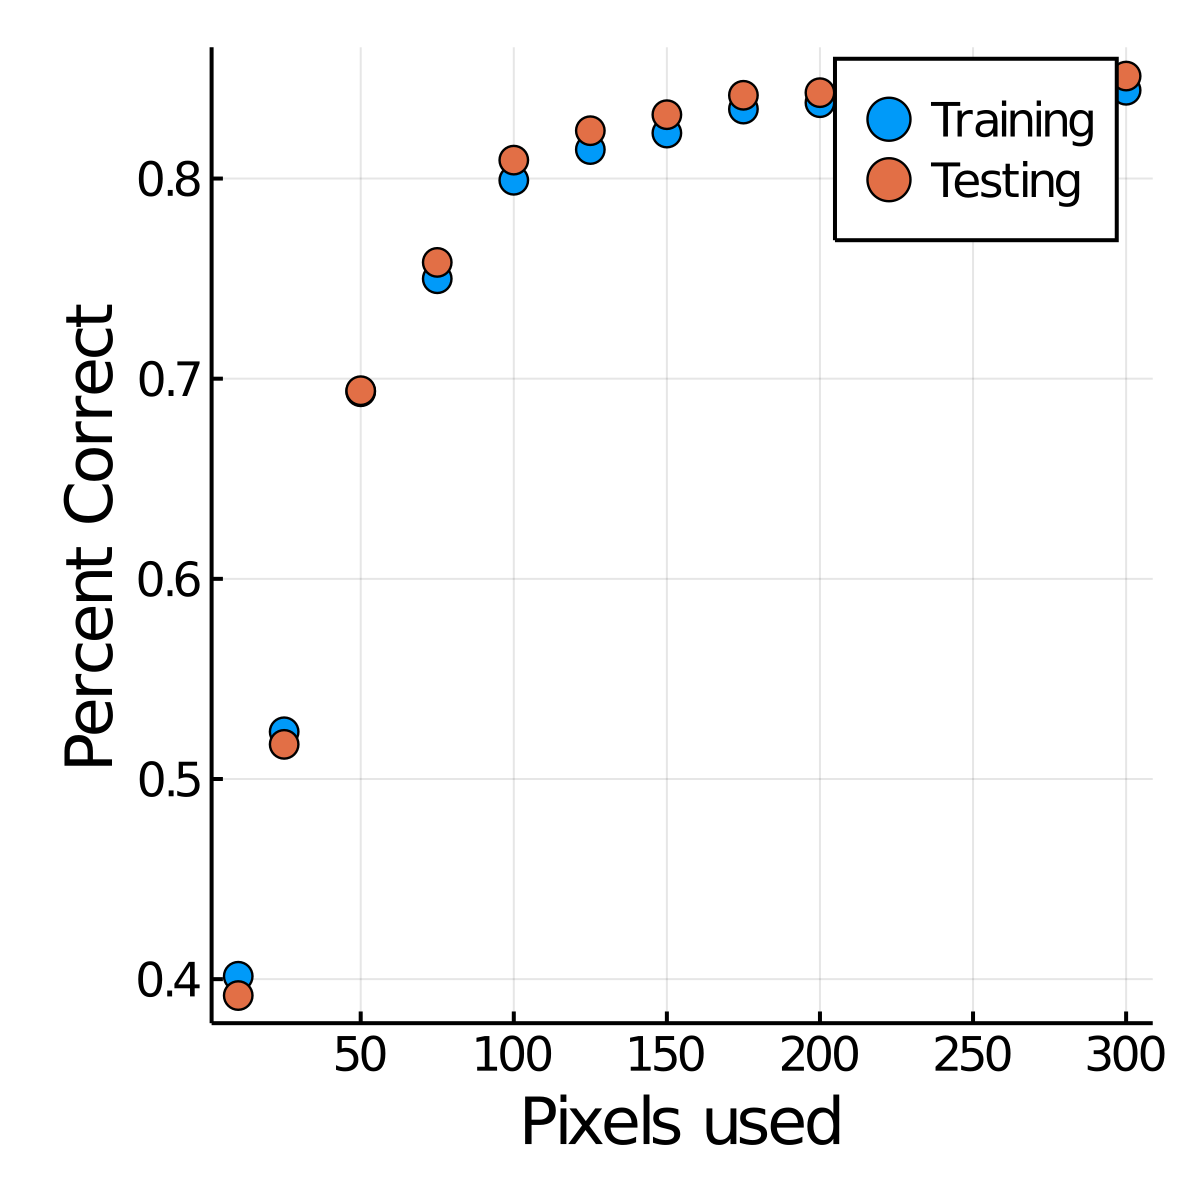

In [49]:
scatter(k_range[:],
        [TrainAccuracyKPixels TestAccuracyKPixels] ,
        label = ["Training" "Testing"],
        xlabel = "Pixels used",
        ylabel = "Percent Correct",
        size = (300, 300))

Just with least squares, we can get around 80% accuracy on our testing set just using ~100 pixels. That is only 12% of the total pixels in our images. 

## 4. Most important digits by digit

We'll now break down the data into single digits. There will be seperate dataset so that the label is 1 if the digit is digit $k$ and 0 otherwise. With this formalation, we can analyze our ability to idenitfy individual digits and the pixels relevant for this identification.

In [50]:
### Take most important pictures in rows or whatever
function is_digit_k(labels, k)
    return labels .== k
end

is_digit_k (generic function with 1 method)

In [51]:
## By digit

function model_by_digit(model, λ)
    TrainingAccuracyByDigit = Float64[]
    TestAccuracyByDigit = Float64[]
    beta = []
    
    model.alpha = λ
    for k in 0:9
        digit_data = is_digit_k(train_labels, k)
        fit!(model, X', digit_data)
        
        #Y_MODEL_TRAIN = mapslices(x -> ceiling(x), predict(model, X'), dims=2)
        # Y_MODEL_TEST = mapslices(x -> ceiling(x), predict(model, X_test'), dims=2)
        Y_MODEL_TRAIN = round.(predict(model, X'))
        Y_MODEL_TEST = round.(predict(model, X_test'))
        
        push!(TrainingAccuracyByDigit,
        percent_correct(digit_data, Y_MODEL_TRAIN))
        
        push!(TestAccuracyByDigit,
        percent_correct(is_digit_k(test_labels, k), Y_MODEL_TEST))
        
        push!(beta, model[:coef_])
    end
    
    return TrainingAccuracyByDigit, TestAccuracyByDigit, beta
end

model_by_digit (generic function with 1 method)

#### LASSO by digit

In [52]:
modelLasso = Lasso(alpha = 0.001, warm_start = true)
TrainingAccuracyByDigit, TestAccuracyByDigit, betasLASSO  = model_by_digit(modelLasso, 0.01);

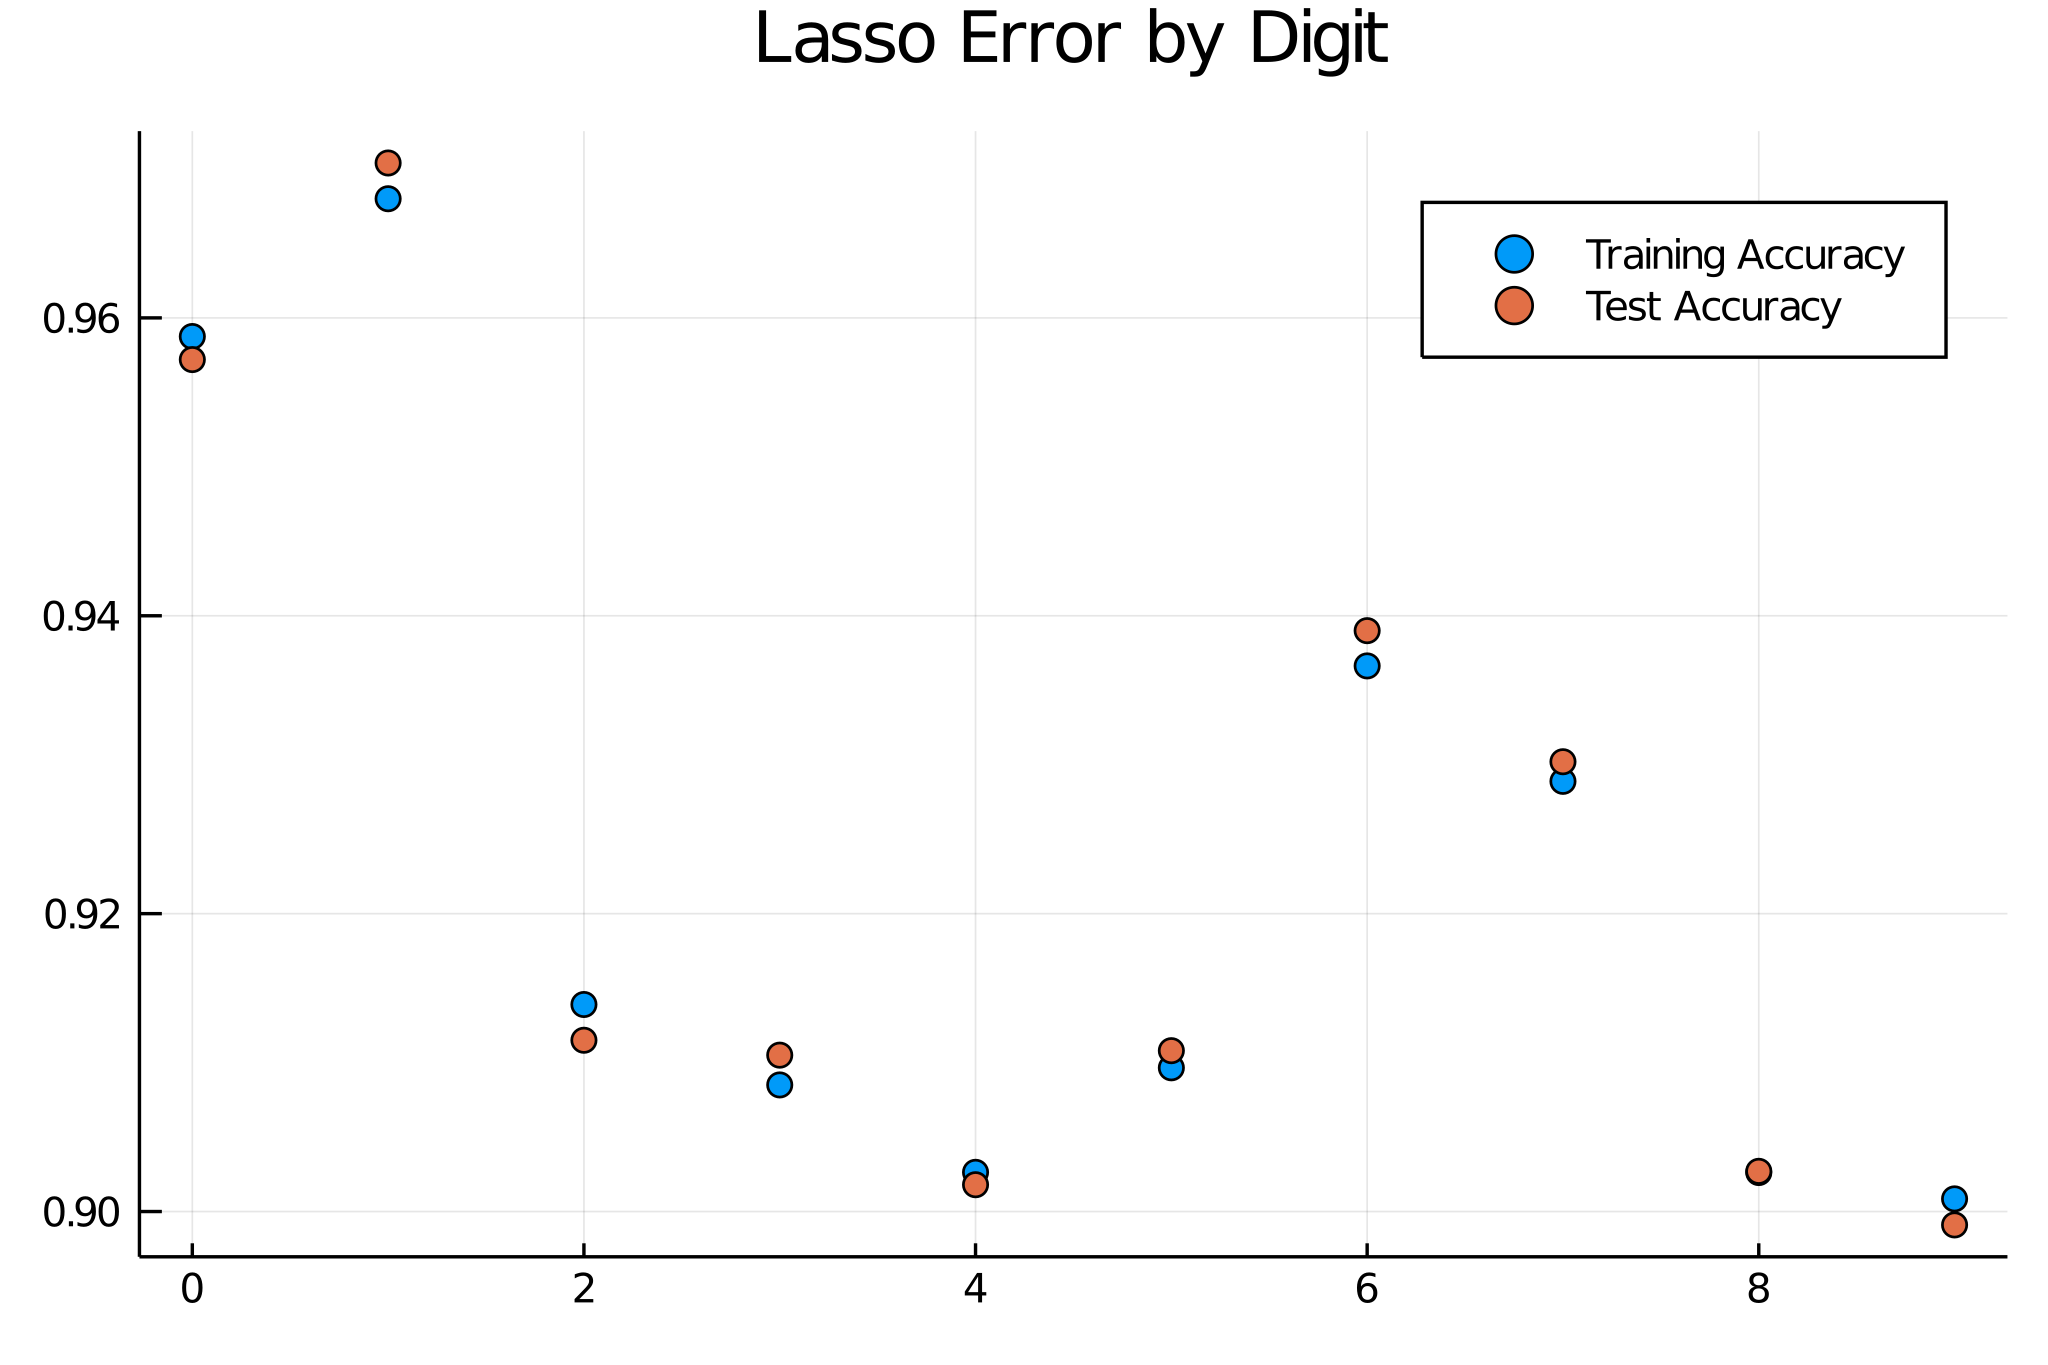

In [53]:
scatter(0:9, 
    [ TrainingAccuracyByDigit TestAccuracyByDigit],
    title = "Lasso Error by Digit",
    label = ["Training Accuracy" "Test Accuracy"])

When it comes to simply identifying one digit from all others, we see that it is easily possible to get above 90% accuracy. The only hardest digits to identify being 4, 8, and 9

In [54]:
top_digits = []

for digit in 0:9
    push!(top_digits,
    heatmap(reshape( betasLASSO[digit+1] .!= 0, 28, 28),
    title = " ",
    colorbar = false,
    xticks = false,
    yticks = false))
end

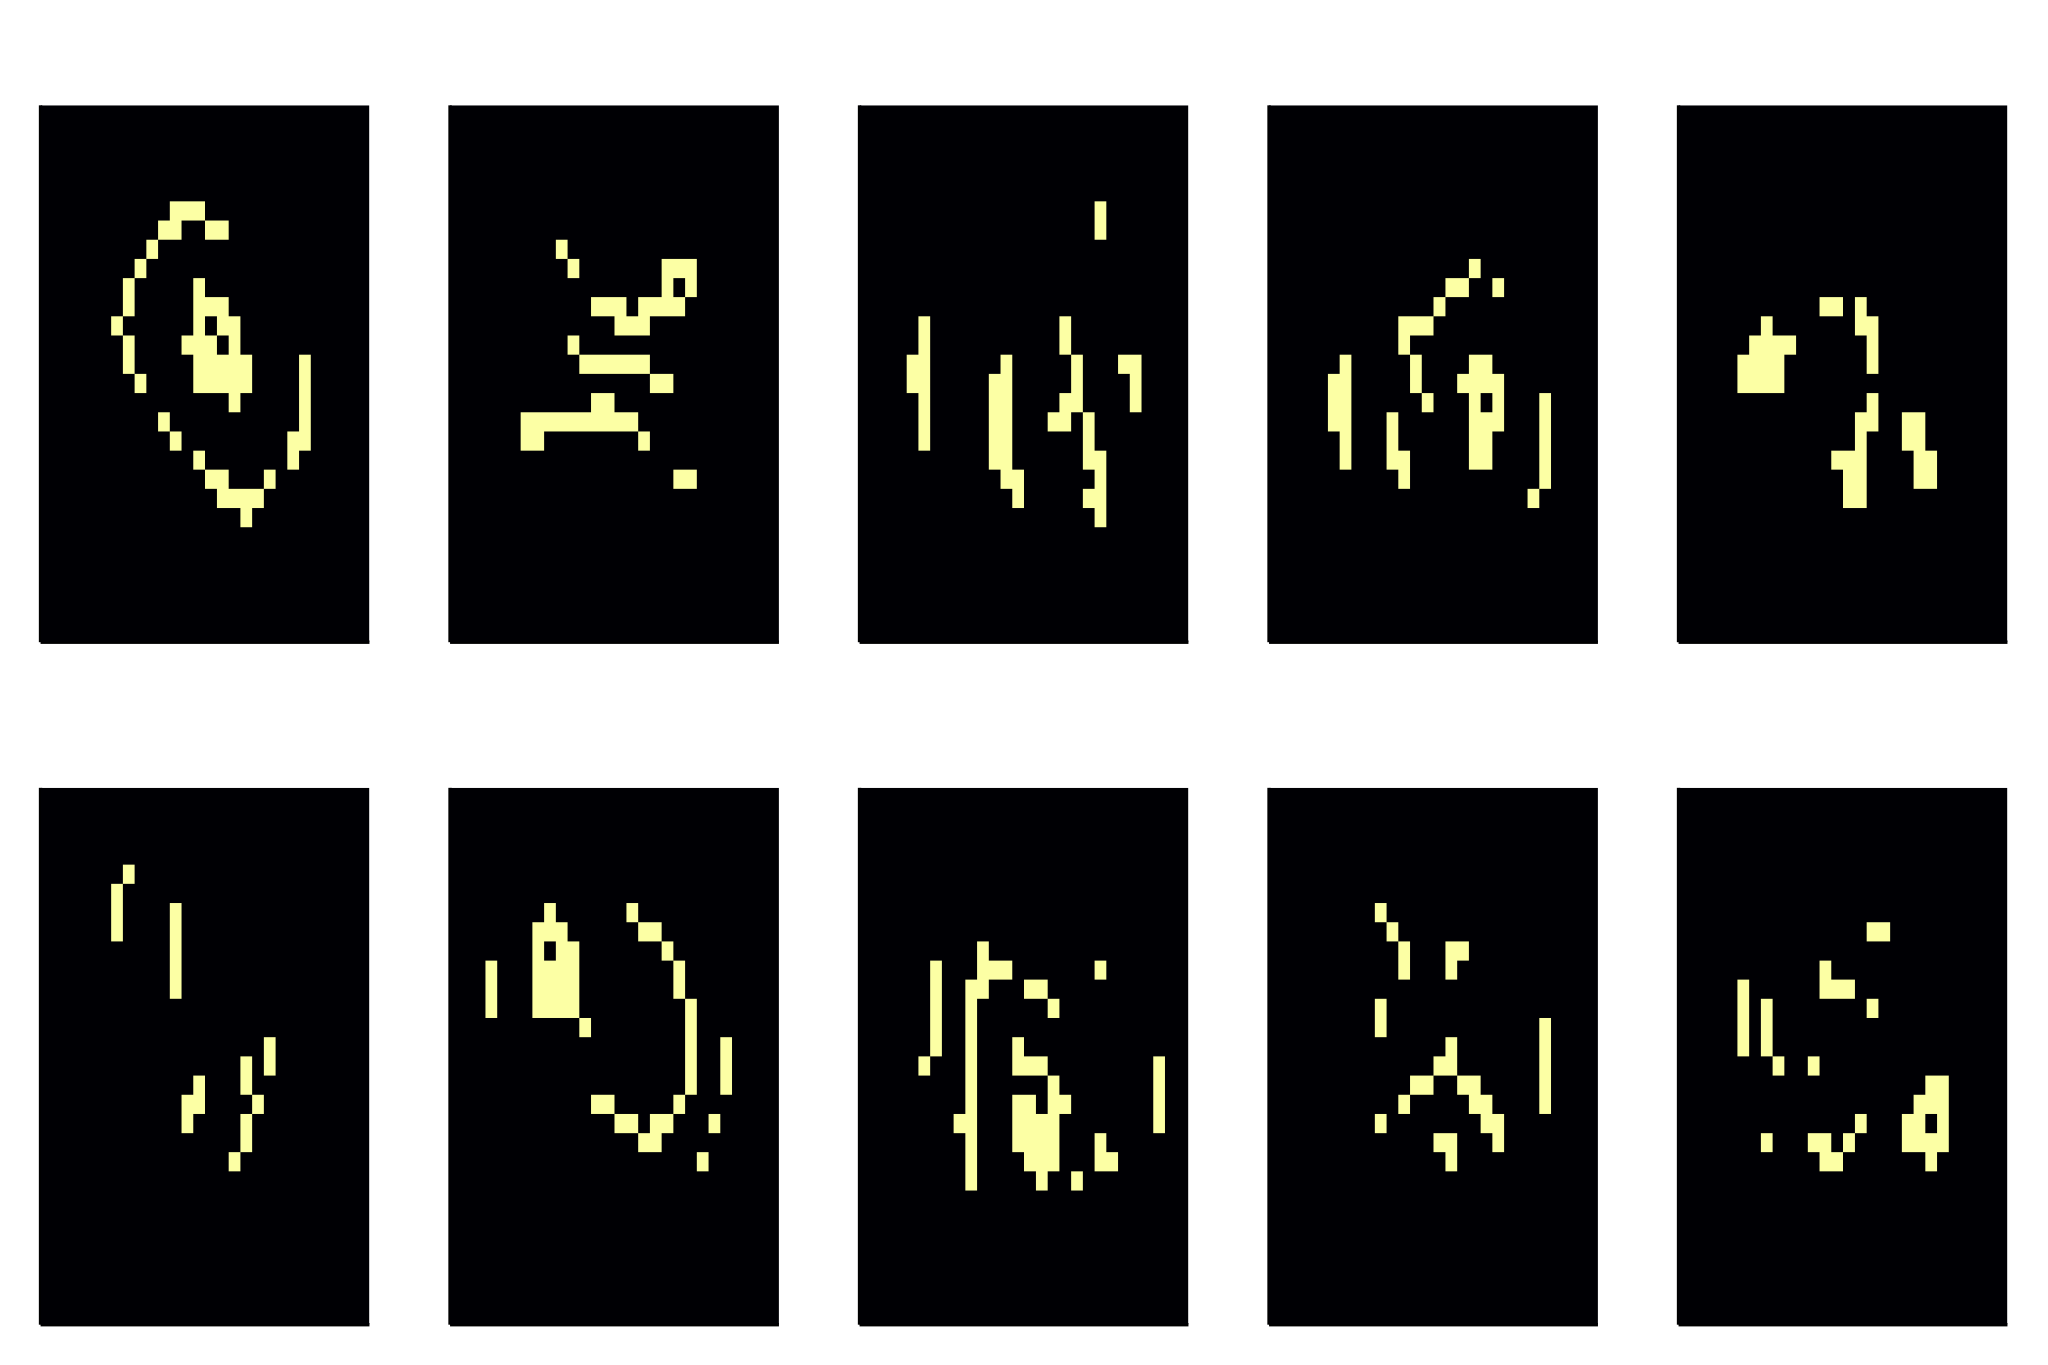

In [55]:
plot(top_digits..., layout = (2,5))

Here, the yellow pixels are those with non-zero weights. We see very few pixels are useful for identifying the digits individually.  We can also apply the previous approach of testing accuracy with a fixed number of pixels of interest.

In [56]:
function model_by_digit_k(betas, k)
    TrainingAccuracyByDigit = Float64[]
    TestAccuracyByDigit = Float64[]

    for digit in 0:9
        digit_data = is_digit_k(train_labels, digit)
        
        kbetaLS = digit_data' * pinv(mask_data_mat(X, top_k_pixels(betas[digit+1], k)))

        yhat = least_squares_predict(kbetaLS, X, digit_data)
    
        push!(TrainingAccuracyByDigit,
            percent_correct(yhat, digit_data))

        yhat = least_squares_predict(kbetaLS, X_test, is_digit_k(test_labels, digit))
        push!(TestAccuracyByDigit, 
            percent_correct(yhat, is_digit_k(test_labels, digit)))
    end
    return TrainingAccuracyByDigit, TestAccuracyByDigit
end

model_by_digit_k (generic function with 1 method)

In [57]:
kTrainingAccuracyByDigit, kTestAccuracyByDigit = model_by_digit_k(betasLASSO', 10)

([0.9012833333333333, 0.8876333333333334, 0.9007, 0.8978166666666667, 0.9026333333333333, 0.90965, 0.9013666666666666, 0.8955833333333333, 0.9024833333333333, 0.90085], [0.902, 0.8865, 0.8968, 0.899, 0.9018, 0.9108, 0.9042, 0.8972, 0.9026, 0.8991])

Since this processs is bit slow, we'll only plot it for a single fixed k.

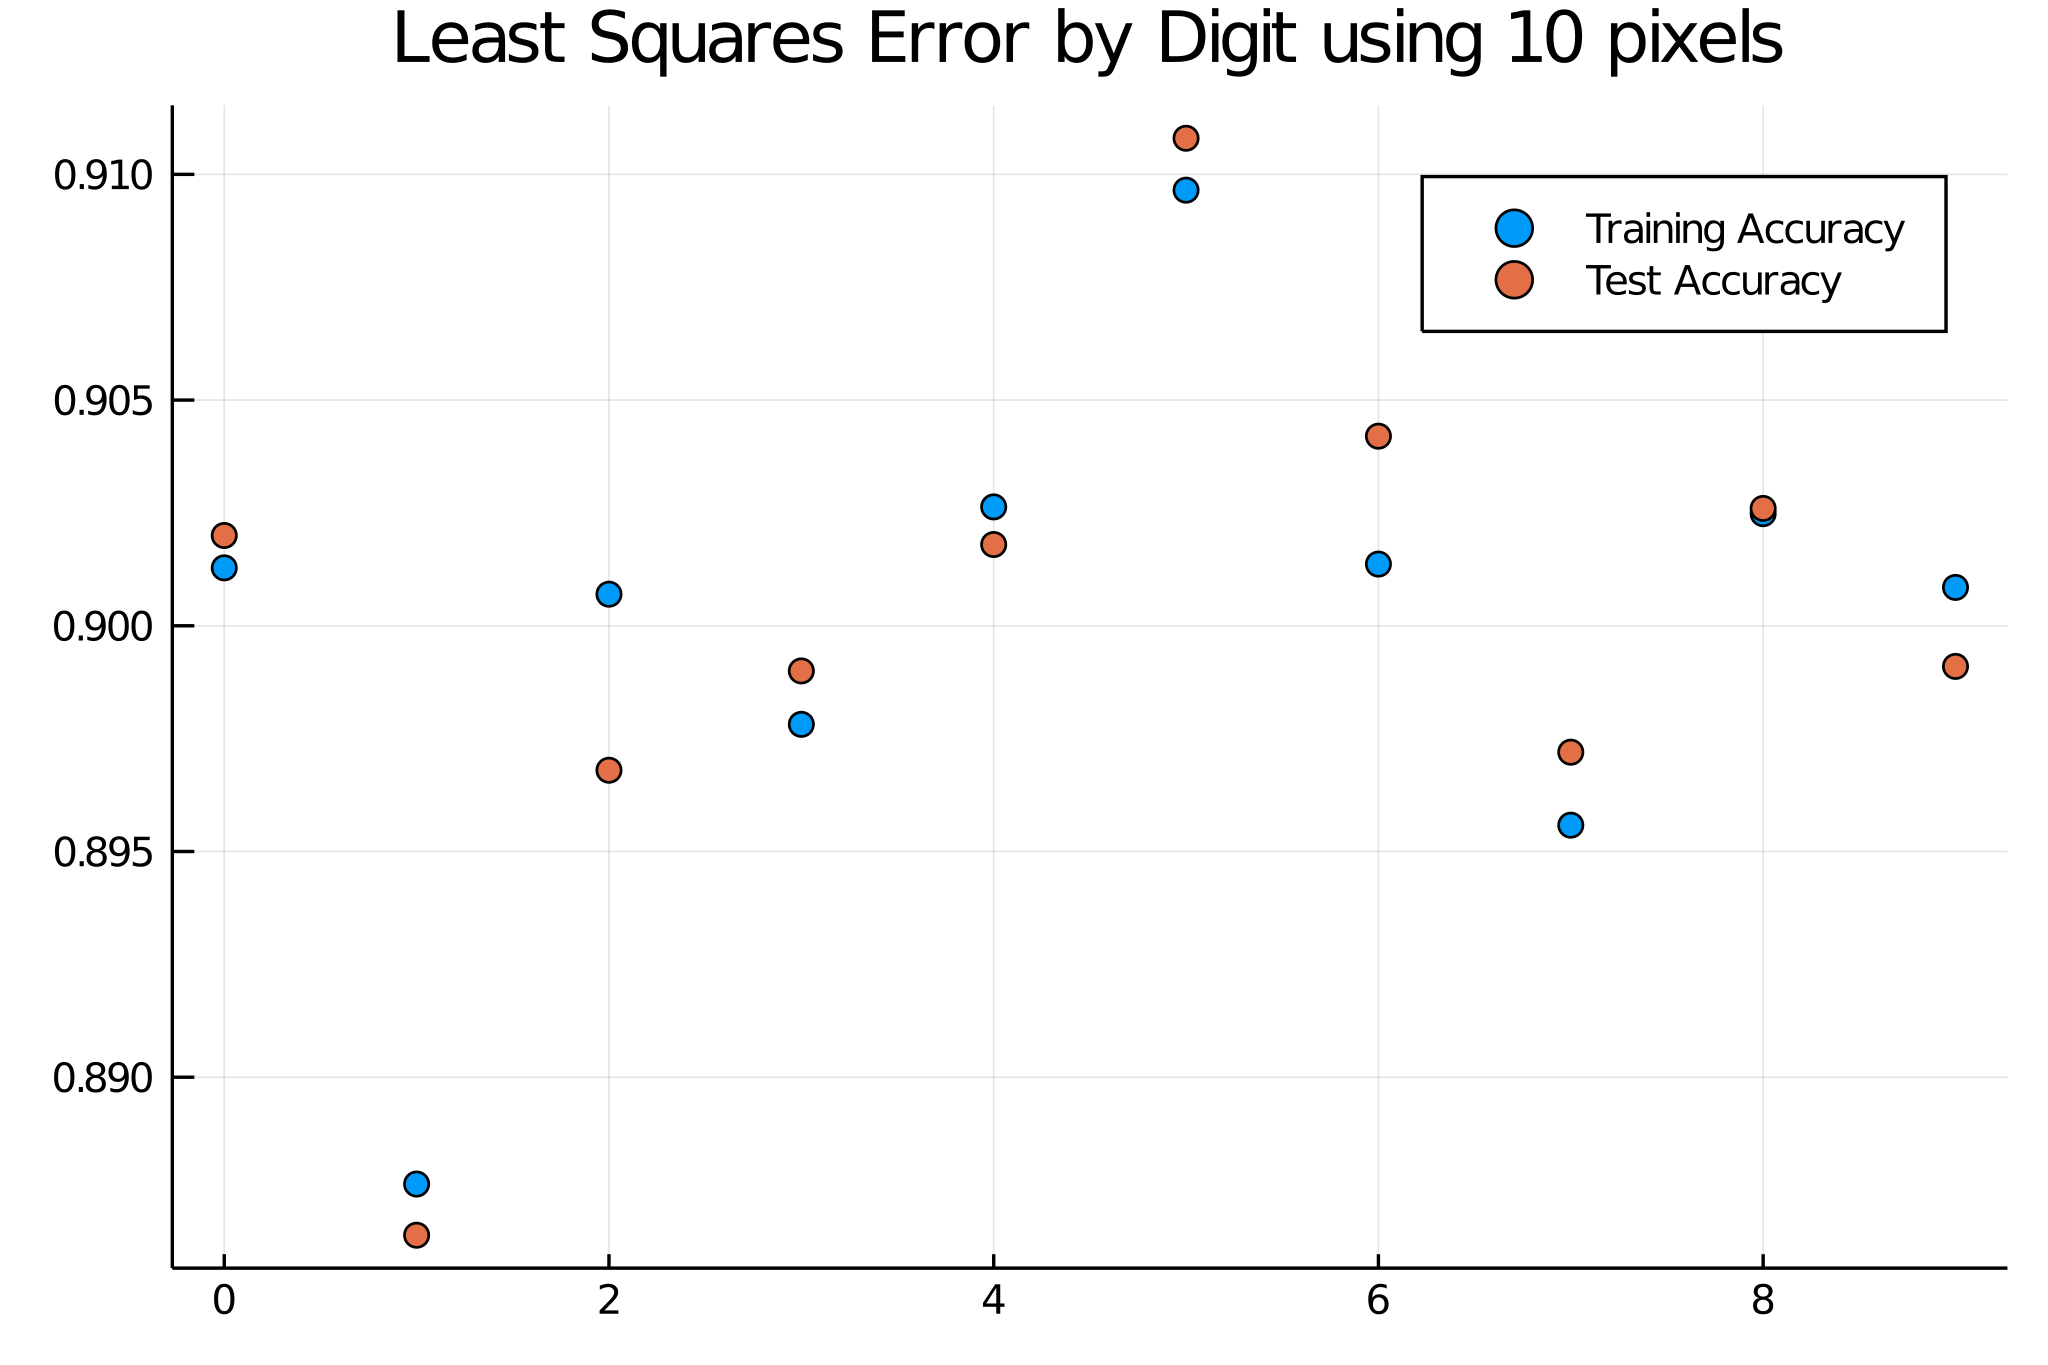

In [58]:
scatter(0:9, 
    [ kTrainingAccuracyByDigit kTestAccuracyByDigit],
    title = "Least Squares Error by Digit using 10 pixels",
    label = ["Training Accuracy" "Test Accuracy"])

We can see that we have nearly 90% accuracy across the board using least squares on only 10 pixels per digit.

#### Ridge by digit

In [59]:
modelRidge = Ridge(alpha = 0.001)
TrainingAccuracyByDigit, TestAccuracyByDigit, betasRidge  = model_by_digit(modelRidge, 0.01);

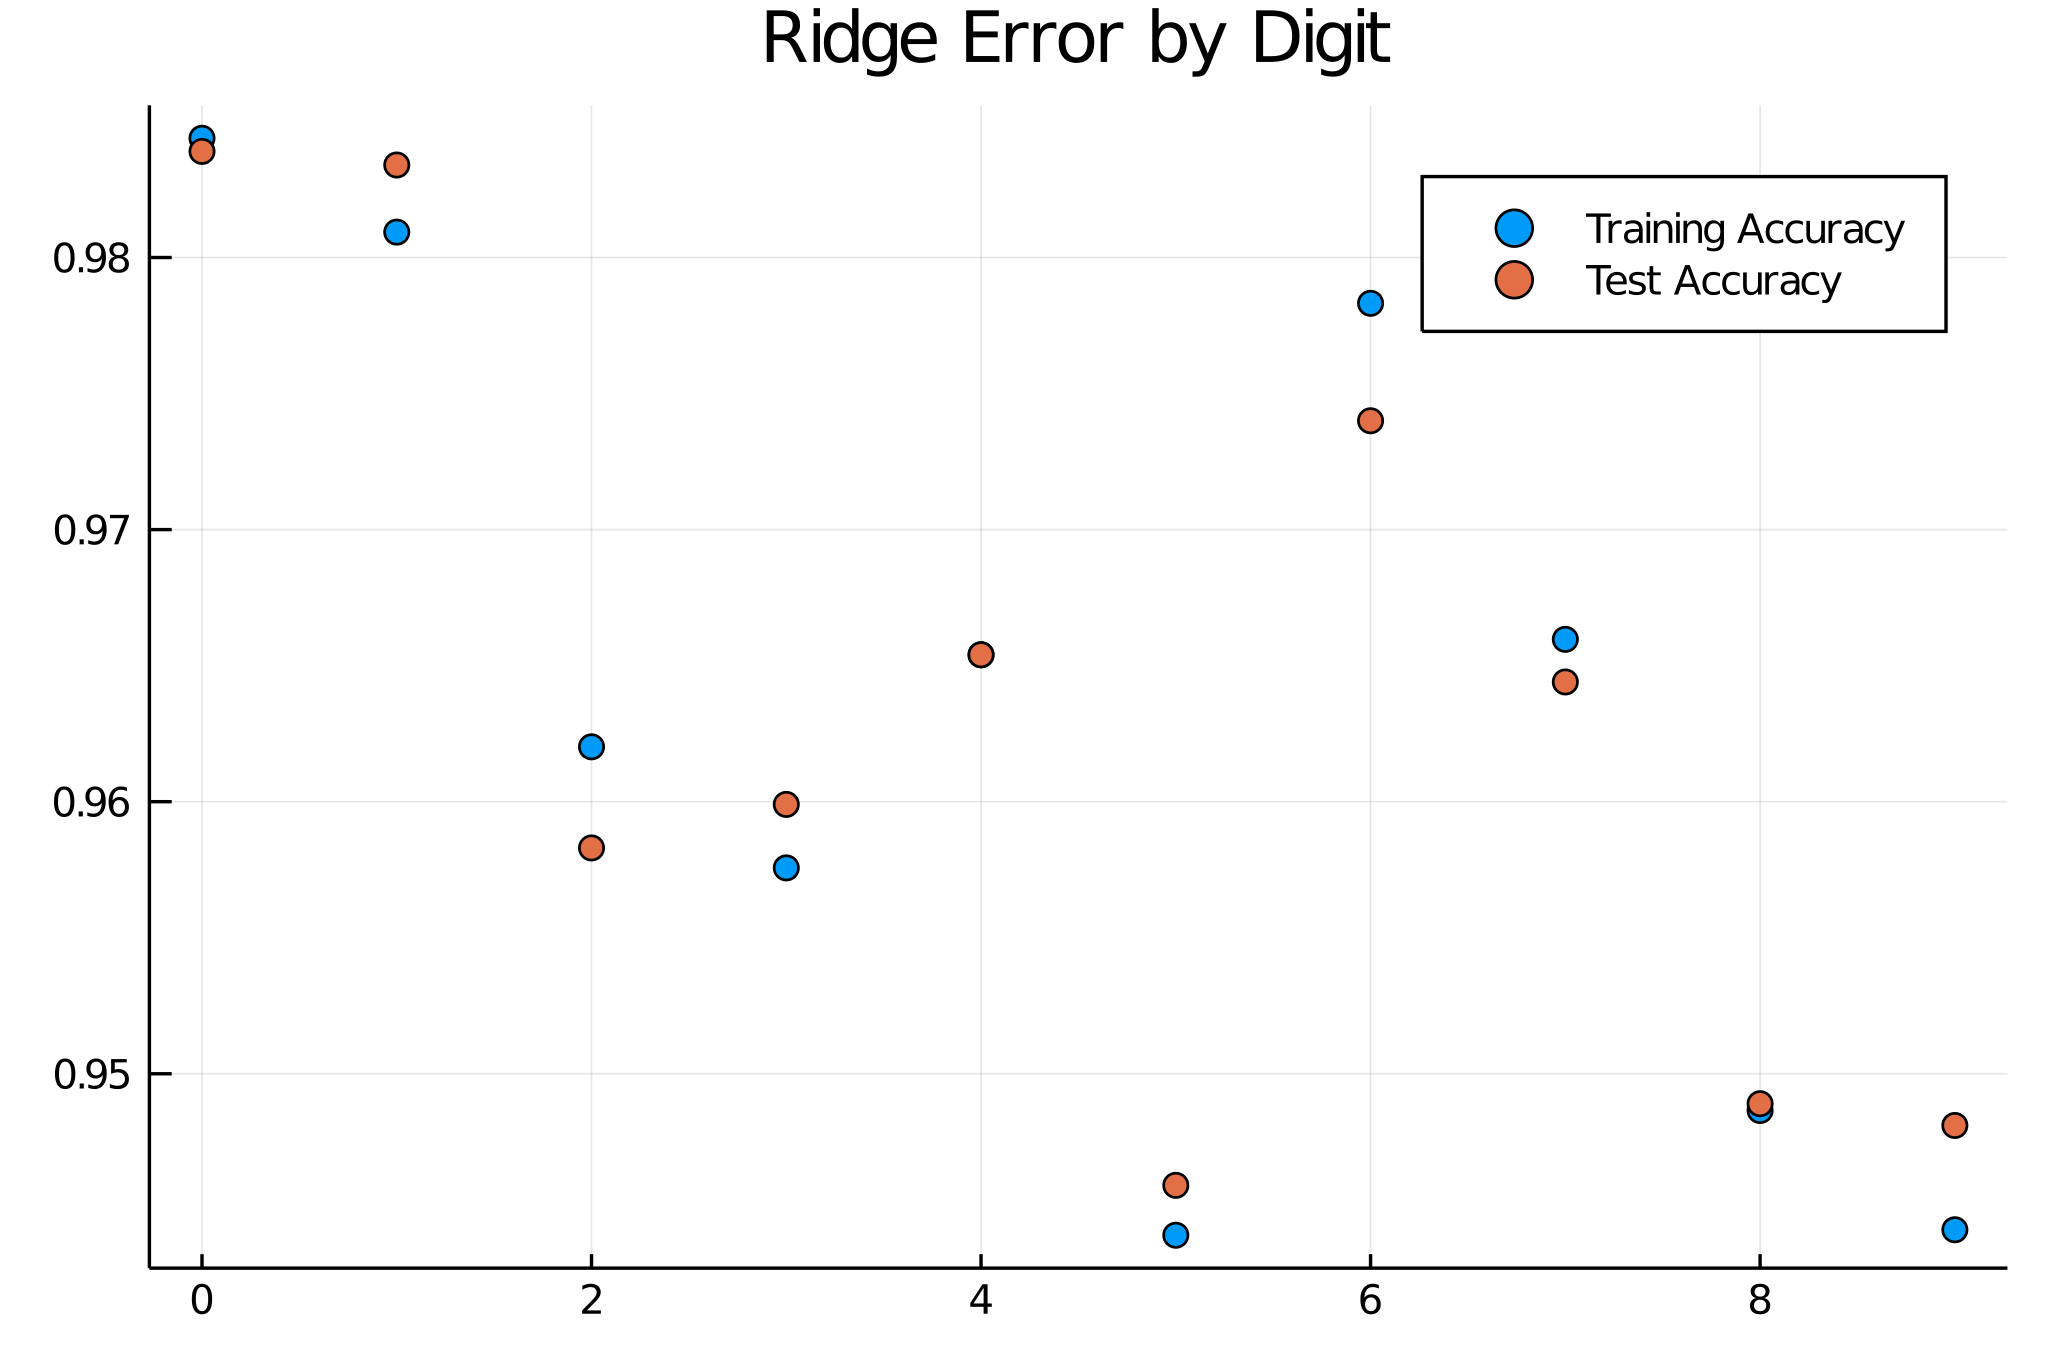

In [60]:
scatter(0:9, 
    [ TrainingAccuracyByDigit TestAccuracyByDigit],
    title = "Ridge Error by Digit",
    label = ["Training Accuracy" "Test Accuracy"])

 We can use these lienar models to detect whether or not an integer is an 8 with high accuracy in the case of both lasso and ridge regression.

## 5. Interpretation.

The general idea of this I think is to find a way of weighting the various pixels in an image and see how we can use the brightness of those pixels to figure out the content of the entire image. By restricting to pixels of interest using methods like LASSO, we can decrease the total amount of information we need to process before we make our predictions. This to me also suggests that not all of the information contained in the image is necessary and following in theme of the course, we want to figure out the actual rank of this image space and our mapping from images to labels.

## A. Helper Functions. RUN FIRST.

In [12]:
to_num(x) = label_names[argmax(x)]

function get_pred(A, X, k)
    # Find which label has largest value under A.
   return to_num(A*X[:,k])
end

function percent_correct(Y_data, Y_pred)
    @assert length(Y_data) == length(Y_pred)
    N = length(Y_data)
    
    percent = sum(Y_data .== Y_pred)/N
    return percent
end

percent_correct (generic function with 1 method)

In [13]:
function model_accuracy(model, λ_range)
    TrainingAccuracyByLambda = Float64[]
    TestAccuracyByLambda = Float64[]

   for λ in λ_range
        model.alpha = λ
        fit!(model, X', B')
        Y_MODEL_TRAIN = mapslices(x -> to_num(x), predict(model, X'), dims=2)
        Y_MODEL_TEST = mapslices(x -> to_num(x), predict(model, X_test'), dims=2)

        push!(TrainingAccuracyByLambda,
        percent_correct(train_labels, Y_MODEL_TRAIN))
        
        push!(TestAccuracyByLambda,
        percent_correct(test_labels, Y_MODEL_TEST))
    
    end   
    return TrainingAccuracyByLambda, TestAccuracyByLambda
end

model_accuracy (generic function with 1 method)

In [14]:
function draw_digit_plot(A)

digit_plot = []

for i in 1:10
    push!(digit_plot, 
        heatmap(reshape(A[i,:], 28, 28)', 
            aspectratio=1, 
            yflip=true,
            title = "i = $(label_names[i])",
            titlefontsize  = 12,
            xlim=(0,28),
            ylim=(0,28),
            xticks=false,
            yticks=false,
            #clims=[-1,1],
            legend = :none))
end
    
plot(digit_plot..., layout = (2,5), size = (400, 200)) 
end

draw_digit_plot (generic function with 1 method)